In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from mpl_toolkits.mplot3d import axes3d

In [3]:
# Import input files
weightsParam = pd.read_csv('../Data/EmpiricalWeightParameters.txt',delimiter='\t',encoding='utf-8')
thresholdParam = pd.read_csv('../Data/EmpiricalThresholdParameters.txt',delimiter=',',encoding='utf-8').set_index("var")

# Set right index
keyArr = np.array(weightsParam.keys())
weightsParam = weightsParam.set_index(keyArr)

In [4]:
# Simulation 2

I = 10000

W = np.asarray(weightsParam)
b = np.abs(np.asarray(thresholdParam).ravel())
c = 0.8

X = np.zeros(b.shape, np.bool)
D = np.empty(I, np.uint8)
S = np.concatenate((np.linspace(-15, 15, int(I/2)), np.linspace(15, -15, int(I/2))))

for i in range(I):
    A = np.sum(c*W*X +S[i], axis=1)
    P = 1 / (1 + np.exp(b-A))
    X = P > np.random.uniform(0, 1, P.shape)
    
    D[i] = np.sum(X)

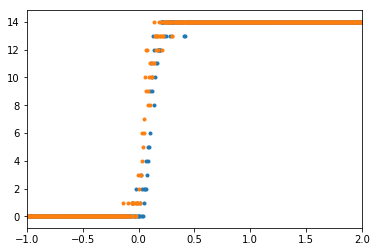

In [5]:
plt.scatter(S[0:5000], D[0:5000],marker=".")
plt.scatter(S[5001:10000], D[5001:10000],marker=".")

plt.xlim(-1, 2)
plt.axis('on')
plt.show()

In [8]:
# Simulation 2 (function)

I = 100

W = np.asarray(weightsParam)
b = np.abs(np.asarray(thresholdParam).ravel())

X = np.zeros(b.shape, np.bool)
D = np.empty(I, np.uint8)
S = np.concatenate((np.linspace(-10, 10, int(I/2)), np.linspace(10, -10, int(I/2))))

def Stress_Model(W, X, b, S, c, I):
    D = np.empty(I, np.uint8)
    for i in range(I):
        A = np.sum(c*W*X +S[i], axis=1)
        P = 1 / (1 + np.exp(b-A))
        X = P > np.random.uniform(0, 1, P.shape)
    
        D[i] = np.sum(X)
        
    return (np.ones_like(S) * c), S, D

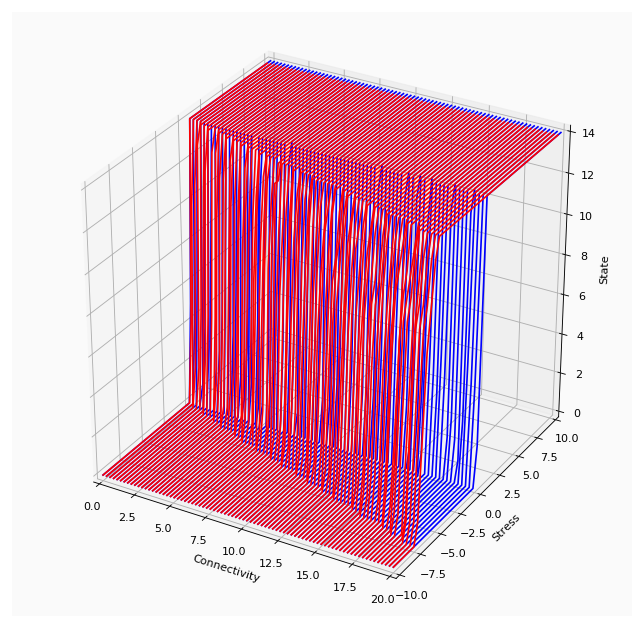

In [13]:
# Time
t = np.linspace(0,100,10000)

fig = plt.figure(facecolor='w', figsize=(10,10), dpi=80)
ax = fig.add_subplot(111, facecolor='0.98', projection='3d')
ax.set_xlim3d(0, 20)
ax.set_ylim3d(-10, 10)
ax.set_zlim3d(0, 14)
#ax.set_title('')
ax.set_xlabel('Connectivity')
ax.set_ylabel('Stress')
ax.set_zlabel('State')

for x in np.linspace(0, 20, 80):
    Con, Str, Sta = Stress_Model(W, X, b, S, x, I)
    ax.plot(Con[0:50], Str[0:50], Sta[0:50], 'b')
    ax.plot(Con[51:100], Str[51:100], Sta[51:100], 'r')

plt.show()
